In [1]:
%matplotlib inline
%pip install opencv-python
%pip install opencv-contrib-python
%pip install - -upgrade numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Usage:   
  /home/pyxsis-usuario/anaconda3/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /home/pyxsis-usuario/anaconda3/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /home/pyxsis-usuario/anaconda3/bin/python -m pip install [options] [-e] <vcs project url> ...
  /home/pyxsis-usuario/anaconda3/bin/python -m pip install [options] [-e] <local project path> ...
  /home/pyxsis-usuario/anaconda3/bin/python -m pip install [options] <archive url/path> ...

no such option: -u
Note: you may need to restart the kernel to use updated packages.


In [13]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity as ssim

/home/pyxsis-usuario/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Importing image data into Numpy arrays
img = np.asarray(Image.open('./imgs/image18.jpg'))
print(repr(img))


array([[[ 33,  33,  33],
        [ 76,  76,  76],
        [ 70,  70,  70],
        ...,
        [ 78,  78,  78],
        [ 89,  89,  89],
        [ 88,  88,  88]],

       [[ 52,  52,  52],
        [ 75,  75,  75],
        [ 80,  80,  80],
        ...,
        [ 86,  86,  86],
        [ 85,  85,  85],
        [ 91,  91,  91]],

       [[ 82,  82,  82],
        [ 87,  87,  87],
        [ 89,  89,  89],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 91,  91,  91]],

       ...,

       [[171, 171, 171],
        [171, 171, 171],
        [170, 170, 170],
        ...,
        [ 61,  61,  61],
        [ 56,  56,  56],
        [ 41,  41,  41]],

       [[171, 171, 171],
        [166, 166, 166],
        [166, 166, 166],
        ...,
        [ 49,  49,  49],
        [ 56,  56,  56],
        [ 50,  50,  50]],

       [[168, 168, 168],
        [163, 163, 163],
        [163, 163, 163],
        ...,
        [ 45,  45,  45],
        [ 51,  51,  51],
        [ 58,  58,  58]]

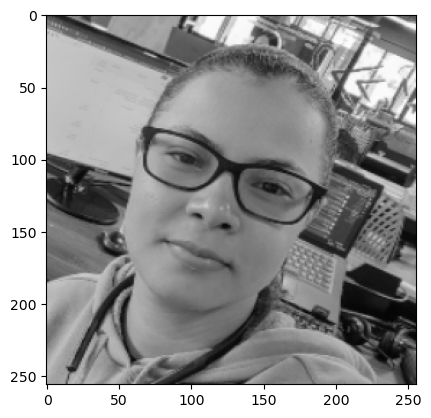

In [5]:
imgplot = plt.imshow(img)

In [6]:
#Load all images

image_folder = './imgs/'
image_files = [os.path.join(image_folder, filename)
               for filename in os.listdir(image_folder)]

images = []
for image_file in image_files:
    image = cv2.imread(image_file)
    images.append(image)


In [7]:
# We'll ensure all images have the same dimensions:
# Example: Resize all images to a common size (e.g., 256x256)
common_size = (256, 256)
images = [cv2.resize(image, common_size) for image in images]

In [9]:
# Now, let's calculate the pixel-wise average of all the loaded images.

average_face = np.mean(images, axis=0).astype(np.uint8)
average_face

array([[[203, 203, 203],
        [205, 205, 205],
        [206, 206, 206],
        ...,
        [211, 211, 211],
        [211, 211, 211],
        [211, 211, 211]],

       [[203, 203, 203],
        [204, 204, 204],
        [205, 205, 205],
        ...,
        [211, 211, 211],
        [211, 211, 211],
        [213, 213, 213]],

       [[205, 205, 205],
        [205, 205, 205],
        [206, 206, 206],
        ...,
        [212, 212, 212],
        [213, 213, 213],
        [214, 214, 214]],

       ...,

       [[112, 112, 112],
        [112, 112, 112],
        [111, 111, 111],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [106, 106, 106]],

       [[111, 111, 111],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [107, 107, 107]],

       [[110, 110, 110],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [103, 103, 103]]

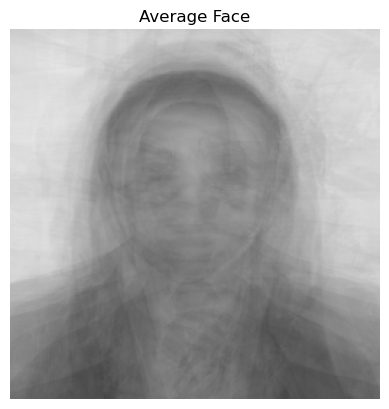

In [10]:
# Display the average face

plt.imshow(cv2.cvtColor(average_face, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Average Face')
plt.show()


In [11]:
# Save the average face as an image
cv2.imwrite('./imgs/average_face.png', average_face)

True

How distant is your face from the average? How would you measure it?


To measure how distant my face is from the average face calculated from the cohort, we can use a metric such as Mean Squared Error (MSE) or Structural Similarity Index (SSIM). These metrics can help quantify the similarity or dissimilarity between two images.

Here's how we can calculate both MSE and SSIM:

**MSE measures the average squared difference between corresponding pixels in two images. Lower MSE values indicate greater similarity.**

In [12]:
# Load the average face image and your face image
average_face = cv2.imread('./imgs/average_face.png')
your_face = cv2.imread('./imgs/image18.jpg')

# Ensure both images have the same dimensions
average_face = cv2.resize(average_face, your_face.shape[:2])

# Calculate MSE
mse = np.mean((average_face - your_face) ** 2)

print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 102.42045593261719


**SSIM is a more advanced metric that not only considers pixel-wise differences but also takes into account structural information and luminance. Higher SSIM values indicate greater similarity.**

In [15]:
# Load the average face image and your face image
average_face = cv2.imread('./imgs/average_face.png', cv2.IMREAD_GRAYSCALE)
your_face = cv2.imread('./imgs/image18.jpg', cv2.IMREAD_GRAYSCALE)

# Ensure both images have the same dimensions
average_face = cv2.resize(average_face, your_face.shape[::-1])

# Calculate SSIM
ssim_score = ssim(average_face, your_face)

print(f"Structural Similarity Index (SSIM): {ssim_score}")


Structural Similarity Index (SSIM): 0.3298242008285208


**The measure range for Mean Squared Error (MSE) and Structural Similarity Index (SSIM) is as follows:**

Mean Squared Error (MSE):

Range: 0 to positive infinity

Interpretation: Lower MSE values indicate greater similarity between the two images. An MSE of 0 means that the two images are identical.

Structural Similarity Index (SSIM):

Range: -1 to 1

Interpretation:

SSIM = 1: Perfect similarity between the two images.

SSIM > 0.9: Very high similarity.

SSIM > 0.8: High similarity.

SSIM > 0.7: Moderate similarity.

SSIM > 0.6: Low similarity.

SSIM < 0: Negative values indicate dissimilarity.